In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout, Dense
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
folder = 'train'
images = []
y_idx = []
k = 0
for i in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder,i)):
        img = cv2.imread(os.path.join(os.path.join(folder,i),filename))
        if img is not None:
            images.append(img)
            y_idx.append(k)
    k = k + 1


n_train = len(images)
x_train = np.zeros((n_train, 64, 64, 3))
y_train = np.zeros((n_train, 1))

for i in range(n_train):
    x_train[i,:,:,:] = images[i]
    y_train[i] = y_idx[i]

In [3]:
folder = 'test'
images = []
y_idx = []
k = 0
for i in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder,i)):
        img = cv2.imread(os.path.join(os.path.join(folder,i),filename))
        if img is not None:
            images.append(img)
            y_idx.append(k)
    k = k + 1
    

n_test = len(images)
x_test = np.zeros((n_test, 64, 64, 3))
y_test = np.zeros((n_test, 1))


for i in range(n_test):
    x_test[i,:,:,:] = images[i]
    y_test[i] = y_idx[i]

In [4]:
num_class = 10
x_train = x_train.astype('float64') # change integers to 64-bit
#floating point numbers
x_test = x_test.astype('float64')
x_train /= 255 # normalize the input
x_test /= 255

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (10130, 64, 64, 3)
y_train shape: (10130, 10)
x_test shape: (1404, 64, 64, 3)
y_test shape: (1404, 10)


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10


159/159 [==============================] - 17s 96ms/step - loss: 1.4393 - accuracy: 0.4839
Epoch 2/10
159/159 [==============================] - 15s 95ms/step - loss: 1.0078 - accuracy: 0.6563
Epoch 3/10
159/159 [==============================] - 15s 97ms/step - loss: 0.8725 - accuracy: 0.6991
Epoch 4/10
159/159 [==============================] - 16s 98ms/step - loss: 0.7756 - accuracy: 0.7317
Epoch 5/10
159/159 [==============================] - 16s 100ms/step - loss: 0.6880 - accuracy: 0.7615
Epoch 6/10
159/159 [==============================] - 16s 99ms/step - loss: 0.6364 - accuracy: 0.7855
Epoch 7/10
159/159 [==============================] - 16s 99ms/step - loss: 0.5526 - accuracy: 0.8109
Epoch 8/10
159/159 [==============================] - 16s 100ms/step - loss: 0.5010 - accuracy: 0.8281
Epoch 9/10
159/159 [==============================] - 16s 101ms/step - loss: 0.4486 - accuracy: 0.8467
Epoch 10/10
159/159 [==============================] - 16s 100ms/step - loss:

Text(0, 0.5, 'accuracy')

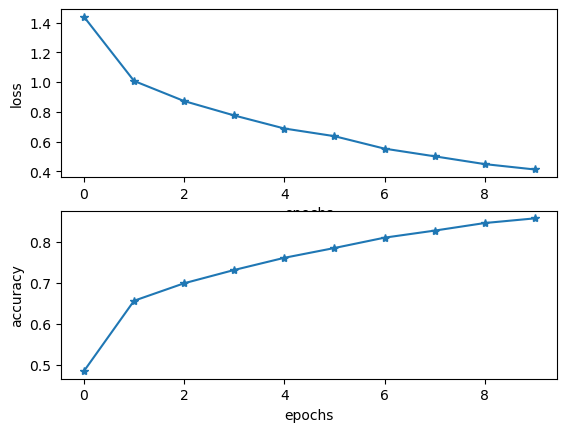

In [10]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], '*-')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'*-')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [11]:
score = model.evaluate(x_test, y_test)
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

44/44 [==============================] - 1s 14ms/step - loss: 0.8904 - accuracy: 0.7023
loss on test data:  0.8903890252113342
accuracy on test data: 0.7022792100906372
